In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *

def normal_equation(x,y,*mode):
    n = len(x)
    ex = sum(x)
    ey = sum(y)
    exy = sum([x[i]*y[i] for i in range(n)])
    exx = sum([x[i]**2 for i in range(n)])
    m = (n*exy-ex*ey)/(n*exx-ex**2) 
    b = (ey-m*ex)/n
    if mode:
        b = ey/n
        m = 0
    return m,b


def generate_custom_sine_wave(num_points):
    x = np.linspace(-1, 1, num_points)
    y = np.sin(np.pi * x)    
    return x, y

def generate_random_sine_wave(num_points,noise):
    # x = np.linspace(-1, 1, 1000)
    # ranx = random.sample(x.tolist(), num_points)
    ranx = [random.uniform(-1.0,1.0) for _ in range(num_points)]
    if noise:
        y = [np.sin(np.pi * xi)+random.uniform(-noise,noise) for xi in ranx]  
    else:
        y = [np.sin(np.pi * xi) for xi in ranx]  
    return ranx, y

def gen_xsq(num_points):
    x = np.linspace(-1, 1, num_points)
    y = np.square(x)
    return x,y

def gen_ran_xsq(num_points,noise):
    # x = np.linspace(-1, 1, num_points+10)
    # ranx = random.sample(x.tolist(), num_points)
    ranx = [random.uniform(-1.0,1.0) for _ in range(num_points)]
    if noise:
        y = [xi**2 + random.uniform(-noise,noise) for xi in ranx]
    else:
        y = [xi**2 for xi in ranx]
    return ranx,y

def plot_line_equation(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    x_values = list(np.linspace(-1, 1, 1000))
    y_values = [m * x + b for x in x_values]
    return x_values,y_values

def plot_line_mb(m,b):
    x_values = list(np.linspace(-1, 1, 1000))
    y_values = [m * x + b for x in x_values]
    return x_values,y_values

def mbarbbar(m,b):
    mbar = sum(m)/len(m)
    bbar = sum(b)/len(b)
    return mbar,bbar

def sine(x):
    fy = np.sin(np.pi * x)
    return fy

def first_ele(arr):
    return arr[0]

def bias2preplt(m,b,xl,yl):
    xy = []
    for i in range(len(xl)):
        xy.append([xl[i],yl[i]])
    xy.sort(key=first_ele)
    x_values = list(np.linspace(-1, 1, len(xy)))
    bi2 = [((m*xy[i][0]+b) - xy[i][1])**2 for i in range(len(xy))]
    # bi2 = [((m*x+b) - np.sin(np.pi*x))**2 for x in x_values]
    return x_values,bi2


def bias22preplt(m,b,xl,yl):
    xy = []
    for i in range(len(xl)):
        xy.append([xl[i],yl[i]])
    xy.sort(key=first_ele)
    x_values = list(np.linspace(-1, 1, len(xy)))
    bi2 = [((m*xy[i][0]+b) - xy[i][1])**2 for i in range(len(xy))]
    # bi2 = [((m*x+b) - x**2)**2 for x in x_values]
    return x_values,bi2


def mb(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    return m,b
    
def gbar(m,b):
    mbar = sum(m)/len(m)
    bbar = sum(b)/len(b)
    x_values = list(np.linspace(-1, 1, 100))
    y_values = [mbar * x + bbar for x in x_values]
    return x_values,y_values

def sumgdx(m,b,x):
    y = 0
    bbar = sum(b)/len(b)
    mbar = sum(m)/len(m)
    for i in range(len(m)):
        y += (((m[i]*x+b[i]) - (mbar*x+bbar))**2)
    return y/len(b)

def sumgdxcon(b):
    y = 0
    bbar = sum(b)/len(b)
    for i in range(len(b)):
        y += ((b[i] - bbar)**2)
    return y/len(b)





In [5]:
def gxconstant(x1,x2):
    y = (np.sin(np.pi * x1) +np.sin(np.pi * x2))/2
    x_values = list(np.linspace(-1, 1, 1000))
    y_values = [y for _ in x_values]

    return x_values,y_values,y

def gx2constant(x1,x2):
    y = (x1**2 + x2**2)/2
    x_values = list(np.linspace(-1, 1, 1000))
    y_values = [y for _ in x_values]

    return x_values,y_values,y

def bias2prepltcons(y,xl,yl):
    xy = []
    for i in range(len(xl)):
        xy.append([xl[i],yl[i]])
    xy.sort(key=first_ele)
    x_values = list(np.linspace(-1, 1, len(xy)))
    
    bi2 = [(y - np.sin(np.pi * x))**2 for x in x_values]
    return x_values,bi2

def bias22prepltcons(y,xl,yl):
    xy = []
    for i in range(len(xl)):
        xy.append([xl[i],yl[i]])
    xy.sort(key=first_ele)
    x_values = list(np.linspace(-1, 1, len(xy)))
    bi2 = [(y - x**2)**2 for x in x_values]
    return x_values,bi2



In [6]:
# Number of points to generate

def sine_wave_linear(num_point,sample,noise):
    xxxxx,yyyyy = generate_custom_sine_wave(1000)
    # Plot the custom sine wave
    plt.plot(xxxxx, yyyyy , linewidth=3)
    
    x = []
    y = []
    ml = []
    bl = []
    line = 0
    for i in range(sample):
        xx, yy = generate_random_sine_wave(num_point,noise)
        plt.scatter(xx,yy,color='red',s=20)
        m,b = normal_equation(xx,yy)
        x_values = list(np.linspace(-1,1,100))
        y_values = [m*xi+b for xi in x_values]
        plt.plot(x_values,y_values , linewidth=0.1,color = 'black')
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        ml.append(m)
        bl.append(b)
        line +=1

    #     for j in range(i+1,num_points):
    #         x_values, y_values = plot_line_equation(x[i],y[i],x[j],y[j])
    #         m,b= mb(x[i],y[i],x[j],y[j])
    #         plt.plot(x_values, y_values, linewidth=0.1,color = 'black')
    #         ml.append(m)
    #         bl.append(b)
    #         line+=1

    mbar,bbar = mbarbbar(ml,bl)
    xbar,ybar = plot_line_mb(mbar,bbar)
    plt.plot(xbar, ybar, linewidth=1,color = 'red')     

    plt.ylim([-2.5,2.5])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('sin(πx)')
    plt.title('y = sin(πx)')
    plt.grid(True)
    plt.show()

    xbi,bi = bias2preplt(mbar,bbar,x,y)
    plt.ylim([0,1])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('bias^2')
    plt.plot(xbi, bi, linewidth=1,color = 'red')
    plt.show()


    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    plt.xlim([-1,1])
    plt.ylim([0,3])
    plt.xlabel('x')
    plt.ylabel('variance')
    plt.plot(xxxx, yyyy, linewidth=1,color = 'red')
    plt.show()


    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    print('total =',line)
    print('bias^2 =',bias)
    print('variance =',variance)
    return bias,variance
        

def sine_wave_linear_no_plot(num_point,sample,noise):
    # Generate the custom sine wave points
    
    x=[]
    y=[]
    ml = []
    bl = []
    ein = []
    line = 0
    for i in range(sample):
        e = 0
        xx, yy = generate_random_sine_wave(num_point,noise)
        m,b = normal_equation(xx,yy)
        ml.append(m)
        bl.append(b)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        # plt.scatter(xx,yy,color='red',s=20)
        for i in range(num_point):
            e += (m*xx[i]+b - yy[i])**2
        ein.append(e/((num_point)))
        line +=1

    mbar,bbar = mbarbbar(ml,bl)

    xbi,bi = bias2preplt(mbar,bbar,x,y)

    xxxx = np.linspace(-1,1,sample)
    yyyy = []
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    Ein = sum(ein)/len(ein)
    return bias,variance,Ein
    


# sine_wave_linear(2,1600)
# Eout=[]
# Ein = []
# biasl = []
# n = []
# for i in range(2,22):
#     bias,var,ein = sine_wave_linear_no_plot(i,300)
#     Eout.append(bias+var)
#     biasl.append(bias)
#     Ein.append(ein)
#     n.append(i)
#     # plt.show()

# # print(biasl)
# # biasbar = sum(biasl)/len(biasl)
# biasbar = sum(biasl[1:])/(len(biasl)-1)
# # biasbar = biasl[len(biasl)//2]
# plt.ylim([0,1])
# plt.plot(n,[biasbar for _ in n],color='black')
# plt.plot(n,Eout,color='red')
# plt.plot(n,Ein,color='blue')
# plt.show()




In [7]:
def sine_wave_constant(num_point,sample,noise):
    # Generate the custom sine wave points
    xxxx,yyyy = generate_custom_sine_wave(1000)
    # Plot the custom sine wave
    plt.plot(xxxx, yyyy , linewidth=3)
    x = []
    y = []
    bl = []
    line = 0
    for i in range(sample):
        xx, yy = generate_random_sine_wave(num_point,noise)
        plt.scatter(xx,yy,color='red',s=20)
        m,b = normal_equation(xx,yy,True)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        x_values = list(np.linspace(-1,1,100))
        y_values = [m*xi+b for xi in x_values]
        plt.plot(x_values,y_values , linewidth=0.1,color = 'black')
        bl.append(b)
        line +=1

    bbar = sum(bl)/len(bl)
    xbar = list(np.linspace(-1, 1, 100))
    ybar = [bbar for _ in xbar]
    plt.plot(xbar, ybar, linewidth=1,color = 'red')


    plt.ylim([-2.5,2.5])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('sin(πx)')
    plt.title('y = sin(πx)')
    plt.grid(True)
    plt.show()


    xbi,bi = bias2preplt(0,bbar,x,y)
    plt.xlabel('x')
    plt.ylabel('bias^2')
    plt.ylim([0,1])
    plt.xlim([-1,1])
    plt.plot(xbi, bi, linewidth=1,color = 'red')
    plt.show()

    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    for _ in xxxx:
        yyyy.append(sumgdxcon(bl))

    plt.xlim([-1,1])
    plt.ylim([0,3])
    plt.xlabel('x')
    plt.ylabel('varience')
    plt.plot(xxxx, yyyy, linewidth=1,color = 'red')
    plt.show()

    print('total =',line)
    print('bias^2 =',sum(bi)/len(bi))
    print('variance =',sum(yyyy)/len(yyyy))

def sine_wave_constant_no_plot(num_point,sample,noise):
    xxxx,yyyy = generate_custom_sine_wave(1000)
    # Plot the custom sine wave
    x=[]
    y=[]
    bl = []
    line = 0
    ein = []
    for i in range(sample):
        e = 0
        xx, yy = generate_random_sine_wave(num_point,noise)
        m,b = normal_equation(xx,yy,True)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        bl.append(b)
        for i in range(num_point):
            e += (m*xx[i]+b - yy[i])**2
        ein.append(e/(1*num_point))
        line +=1

    bbar = sum(bl)/len(bl)

    xbi,bi = bias2preplt(0,bbar,x,y)

    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    for _ in xxxx:
        yyyy.append(sumgdxcon(bl))
    
    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    Ein = sum(ein)/len(ein)
    return bias,variance,Ein

# sine_wave_constant(2,2) 
# Eout=[]
# Ein = []
# biasl = []
# n = []
# for i in range(2,22):
#     bias,var,ein = sine_wave_constant_no_plot(i,500)
#     Eout.append(bias+var)
#     biasl.append(bias)
#     Ein.append(ein)
#     n.append(i)

# biasbar = sum(biasl[1:])/(len(biasl)-1)
# plt.ylim([0,1])
# plt.plot(n,[biasbar for _ in n],color='black')
# plt.plot(n,Eout,color='red')
# plt.plot(n,Ein,color='blue')
# plt.show()   

In [8]:
def sine_wave_origin(num_point,sample,noise):
    xxxx,yyyy = generate_custom_sine_wave(1000)
    # Plot the custom sine wave
    plt.plot(xxxx, yyyy , linewidth=3)
    
    x = []
    y = []
    ml = []
    line = 0
    for i in range(sample):
        xx, yy = generate_random_sine_wave(num_point,noise)
        plt.scatter(xx,yy,color='red',s=20)
        m,b = normal_equation(xx,yy)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        x_values = list(np.linspace(-1,1,100))
        y_values = [m*xi for xi in x_values]
        plt.plot(x_values,y_values , linewidth=0.1,color = 'black')
        ml.append(m)
        line +=1

    #     for j in range(i+1,num_points):
    #         x_values, y_values = plot_line_equation(x[i],y[i],x[j],y[j])
    #         m,b= mb(x[i],y[i],x[j],y[j])
    #         plt.plot(x_values, y_values, linewidth=0.1,color = 'black')
    #         ml.append(m)
    #         bl.append(b)
    #         line+=1

    mbar = sum(ml)/len(ml)
    xbar,ybar = plot_line_mb(mbar,0)
    plt.plot(xbar, ybar, linewidth=1,color = 'red')     

    plt.ylim([-2.5,2.5])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('sin(πx)')
    plt.title('y = sin(πx)')
    plt.grid(True)
    plt.show()

    xbi,bi = bias2preplt(mbar,0,x,y)
    plt.ylim([0,1])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('bias^2')
    plt.plot(xbi, bi, linewidth=1,color = 'red')
    plt.show()


    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    bl = [0 for _ in ml]
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    plt.xlim([-1,1])
    plt.ylim([0,3])
    plt.xlabel('x')
    plt.ylabel('variance')
    plt.plot(xxxx, yyyy, linewidth=1,color = 'red')
    plt.show()


    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    print('total =',line)
    print('bias^2 =',bias)
    print('variance =',variance)
    return bias,variance
        

def sine_wave_origin_no_plot(num_point,sample,noise):
    # Generate the custom sine wave points
    xxxx,yyyy = generate_custom_sine_wave(1000)
    x = []
    y = []
    ml = []
    ein = []
    line = 0
    for i in range(sample):
        e = 0
        xx, yy = generate_random_sine_wave(num_point,noise)
        m,b = normal_equation(xx,yy)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        ml.append(m)
        for i in range(num_point):
            e += (m*xx[i] - yy[i])**2
        ein.append(e/(1*num_point))
        line +=1

    mbar = sum(ml)/len(ml)

    xbi,bi = bias2preplt(mbar,0,x,y)

    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    bl = [0 for _ in ml]
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    Ein = sum(ein)/len(ein)
    return bias,variance,Ein
    


# sine_wave_origin(2,1000)
# Eout=[]
# Ein = []
# biasl = []
# n = []
# for i in range(2,22):
#     bias,var,ein = sine_wave_origin_no_plot(i,500)
#     Eout.append(bias+var)
#     biasl.append(bias)
#     Ein.append(ein)
#     n.append(i)

# biasbar = sum(biasl[1:])/(len(biasl)-1)
# plt.ylim([0,1])
# plt.plot(n,[biasbar for _ in n],color='black')
# plt.plot(n,Eout,color='red')
# plt.plot(n,Ein,color='blue')
# plt.show()

In [9]:


def quadratic_linear(num_point,sample,noise):
    # Generate the custom sine wave points
    xxxx,yyyy = gen_xsq(1000)
    # Plot the custom sine wave
    plt.plot(xxxx, yyyy , linewidth=3)

    x=[]
    y=[]
    ml = []
    bl = []
    line = 0
    for i in range(sample):
        xx, yy = gen_ran_xsq(num_point,noise)
        plt.scatter(xx,yy,color='red',s=20)
        m,b = normal_equation(xx,yy)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        x_values = list(np.linspace(-1,1,100))
        y_values = [m*xi+b for xi in x_values]
        plt.plot(x_values,y_values , linewidth=0.1,color = 'black')
        ml.append(m)
        bl.append(b)
        line +=1

    mbar,bbar = mbarbbar(ml,bl)
    xbar,ybar = plot_line_mb(mbar,bbar)
    plt.plot(xbar, ybar, linewidth=1,color = 'red')     

    plt.ylim([-2.5,2.5])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('x^2')
    plt.title('y = x^2')
    plt.grid(True)
    plt.show()

    xbi,bi = bias22preplt(mbar,bbar,x,y)
    plt.xlabel('x')
    plt.ylabel('bias^2')
    plt.ylim([0,1])
    plt.xlim([-1,1])
    plt.plot(xbi, bi, linewidth=1,color = 'red')
    plt.show()

    xxxx = np.linspace(-1,1,sample)
    # xxxx=sorted(x)
    yyyy = []
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    plt.xlim([-1,1])
    plt.ylim([0,3])
    plt.xlabel('x')
    plt.ylabel('variance')
    plt.plot(xxxx, yyyy, linewidth=1,color = 'red')
    plt.show()

    print('total =',line)
    print('bias^2 =',sum(bi)/len(bi))
    print('variance =',sum(yyyy)/len(yyyy))

def quadratic_linear_no_plot(num_point,sample,noise):
    # Generate the custom sine wave points
    xxxx,yyyy = gen_xsq(1000)

    x=[]
    y=[]
    ml = []
    bl = []
    ein = []
    line = 0
    for i in range(sample):
        e = 0
        xx, yy = gen_ran_xsq(num_point,noise)
        m,b = normal_equation(xx,yy)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        ml.append(m)
        bl.append(b)
        for i in range(num_point):
            e += (m*xx[i]+b - yy[i])**2
        ein.append(e/(1*num_point))
        line +=1

    mbar,bbar = mbarbbar(ml,bl)

    xbi,bi = bias22preplt(mbar,bbar,x,y)

    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    Ein = sum(ein)/len(ein)
    return bias,variance,Ein


# quadratic_linear(2,1000) 
# Eout=[]
# Ein = []
# biasl = []
# n = []
# for i in range(2,22):
#     bias,var,ein = quadratic_linear_no_plot(i,500)
#     Eout.append(bias+var)
#     biasl.append(bias)
#     Ein.append(ein)
#     n.append(i)
# biasbar = sum(biasl[1:])/(len(biasl)-1)
# plt.ylim([0,1])
# plt.plot(n,[biasbar for _ in n],color='black')
# plt.plot(n,Eout,color='red')
# plt.plot(n,Ein,color='blue')
# plt.show()  

In [10]:
def quadratic_origin(num_point,sample,noise):
    # Generate the custom sine wave points
    xxxx,yyyy = gen_xsq(1000)
    # Plot the custom sine wave
    plt.plot(xxxx, yyyy , linewidth=3)

    ml = []
    x = []
    y = []
    line = 0
    for i in range(sample):
        xx, yy = gen_ran_xsq(num_point,noise)
        plt.scatter(xx,yy,color='red',s=20)
        m,b = normal_equation(xx,yy)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        x_values = list(np.linspace(-1,1,100))
        y_values = [m*xi for xi in x_values]
        plt.plot(x_values,y_values , linewidth=0.1,color = 'black')
        ml.append(m)

        line +=1

    mbar = sum(ml)/len(ml)
    xbar,ybar = plot_line_mb(mbar,0)
    plt.plot(xbar, ybar, linewidth=1,color = 'red')     

    plt.ylim([-2.5,2.5])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('x^2')
    plt.title('y = x^2')
    plt.grid(True)
    plt.show()

    xbi,bi = bias22preplt(mbar,0,x,y)
    plt.xlabel('x')
    plt.ylabel('bias^2')
    plt.ylim([0,1])
    plt.xlim([-1,1])
    plt.plot(xbi, bi, linewidth=1,color = 'red')
    plt.show()

    # xxxx = np.linspace(-1,1,sample)
    xxxx = sorted(x)
    yyyy = []
    bl = [0 for _ in ml]
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    plt.xlim([-1,1])
    plt.ylim([0,3])
    plt.xlabel('x')
    plt.ylabel('variance')
    plt.plot(xxxx, yyyy, linewidth=1,color = 'red')
    plt.show()

    print('total =',line)
    print('bias^2 =',sum(bi)/len(bi))
    print('variance =',sum(yyyy)/len(yyyy))

def quadratic_origin_no_plot(num_point,sample,noise):
    # Generate the custom sine wave points
    xxxx,yyyy = gen_xsq(1000)

    x = []
    y = []
    ml = []
    ein = []
    line = 0
    for i in range(sample):
        e = 0
        xx, yy = gen_ran_xsq(num_point,noise)
        m,b = normal_equation(xx,yy)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        ml.append(m)
        for i in range(num_point):
            e += (m*xx[i] - yy[i])**2
        ein.append(e/(1*num_point))
        line +=1

    mbar = sum(ml)/len(ml)

    xbi,bi = bias22preplt(mbar,0,x,y)

    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    bl = [0 for _ in ml]
    for i in xxxx:
        yyyy.append(sumgdx(ml,bl,i))

    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    Ein = sum(ein)/len(ein)
    return bias,variance,Ein


# quadratic_origin(2,100) 
# Eout=[]
# Ein = []
# biasl = []
# n = []
# for i in range(2,22):
#     bias,var,ein = quadratic_origin_no_plot(i,300)
#     Eout.append(bias+var)
#     biasl.append(bias)
#     Ein.append(ein)
#     n.append(i)
# print(biasl)
# biasbar = sum(biasl[1:])/(len(biasl)-1)
# plt.ylim([0,1])
# plt.plot(n,[biasbar for _ in n],color='black')
# plt.plot(n,Eout,color='red')
# plt.plot(n,Ein,color='blue')
# plt.show()  

In [11]:

def quadratic_constant(num_point,sample,noise):
    # Generate the custom sine wave points
    xxxx,yyyy = gen_xsq(1000)
    # Plot the custom sine wave
    plt.plot(xxxx, yyyy , linewidth=3)

    x = []
    y = []
    bl = []
    line = 0
    for i in range(sample):
        xx, yy = gen_ran_xsq(num_point,noise)
        plt.scatter(xx,yy,color='red',s=20)
        m,b = normal_equation(xx,yy,True)
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i])
        x_values = list(np.linspace(-1,1,100))
        y_values = [m*xi+b for xi in x_values]
        plt.plot(x_values,y_values , linewidth=0.1,color = 'black')
        bl.append(b)
        line +=1

    bbar = sum(bl)/len(bl)
    xbar = list(np.linspace(-1, 1, 100))
    ybar = [bbar for _ in xbar]
    plt.plot(xbar, ybar, linewidth=1,color = 'red')


    plt.ylim([-2.5,2.5])
    plt.xlim([-1,1])
    plt.xlabel('x')
    plt.ylabel('x^2')
    plt.title('y = x^2')
    plt.grid(True)
    plt.show()


    xbi,bi = bias22preplt(0,bbar,x,y)
    plt.xlabel('x')
    plt.ylabel('bias^2')
    plt.ylim([0,1])
    plt.xlim([-1,1])
    plt.plot(xbi, bi, linewidth=1,color = 'red')
    plt.show()

    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    for _ in xxxx:
        yyyy.append(sumgdxcon(bl))

    plt.xlim([-1,1])
    plt.ylim([0,3])
    plt.xlabel('x')
    plt.ylabel('variance')
    plt.plot(xxxx, yyyy, linewidth=1,color = 'red')
    plt.show()

    print('total =',line)
    print('bias^2 =',sum(bi)/len(bi))
    print('variance =',sum(yyyy)/len(yyyy))

def quadratic_constant_no_plot(num_point,sample,noise):
    xxxx,yyyy = gen_xsq(1000)

    x = []
    y = []
    bl = []
    line = 0
    ein = []
    for i in range(sample):
        e = 0
        xx, yy = gen_ran_xsq(num_point,noise)
        m,b = normal_equation(xx,yy,True)  
        for i in range(num_point):
            x.append(xx[i])
            y.append(yy[i]) 
        bl.append(b)
        for i in range(num_point):
            e += (m*xx[i]+b - yy[i])**2
        ein.append(e/(1*num_point))
        line +=1

    bbar = sum(bl)/len(bl)

    xbi,bi = bias22preplt(0,bbar,x,y)

    xxxx = np.linspace(-1,1,sample)
    # xxxx = sorted(x)
    yyyy = []
    for _ in xxxx:
        yyyy.append(sumgdxcon(bl))

    bias = sum(bi)/len(bi)
    variance = sum(yyyy)/len(yyyy)
    Ein = sum(ein)/len(ein)
    return bias,variance,Ein

# quadratic_constant(2,1000)
# Eout=[]
# Ein = []
# biasl = []
# n = []
# for i in range(2,22):
#     bias,var,ein = quadratic_constant_no_plot(i,500)
#     Eout.append(bias+var)
#     biasl.append(bias)
#     Ein.append(ein)
#     n.append(i)
# biasbar = sum(biasl[1:])/(len(biasl)-1)
# plt.ylim([0,1])
# plt.plot(n,[biasbar for _ in n],color='black')
# plt.plot(n,Eout,color='red')
# plt.plot(n,Ein,color='blue')
# plt.show()

In [12]:
# quadratic_linear(2,10000,0)

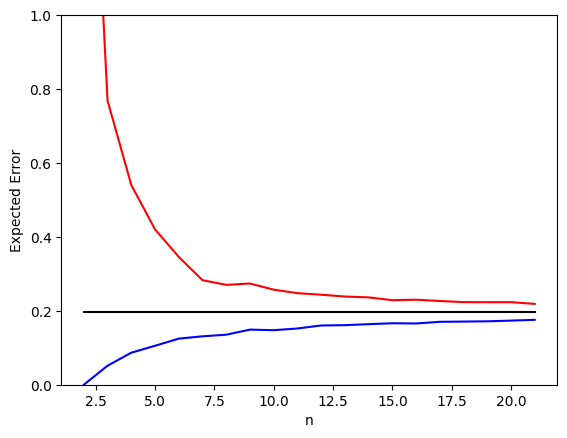

In [13]:


Eout=[]
Ein = []
biasl = []
n = []
for i in range(2,22):
    bias,var,ein = sine_wave_linear_no_plot(i,1000,0)
    Eout.append(bias+var)
    biasl.append(bias)
    Ein.append(ein)
    n.append(i)
biasbar = sum(biasl[1:])/(len(biasl)-1)
plt.xlabel("n")
plt.ylabel("Expected Error")
plt.ylim([0,1])
plt.plot(n,[biasbar for _ in n],color='black')
plt.plot(n,Eout,color='red')
plt.plot(n,Ein,color='blue')
plt.show()

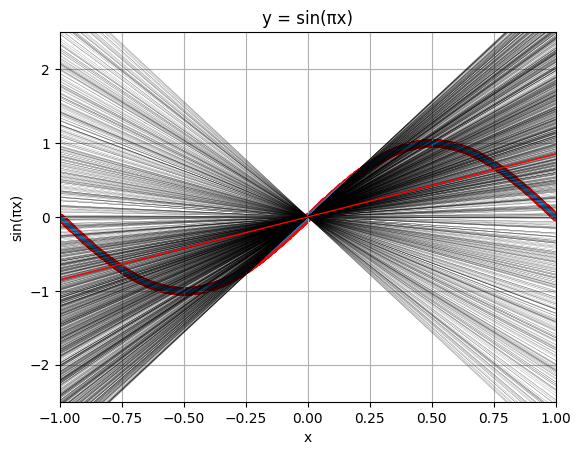

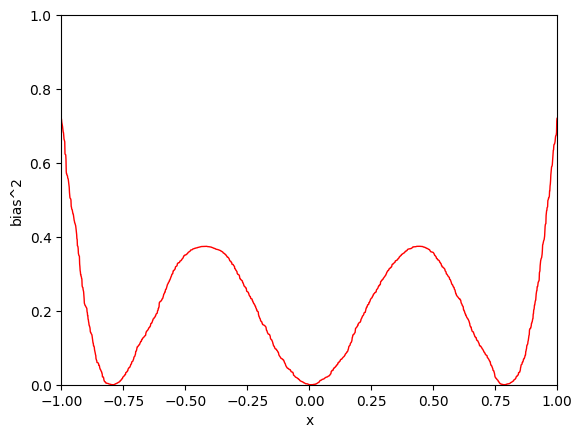

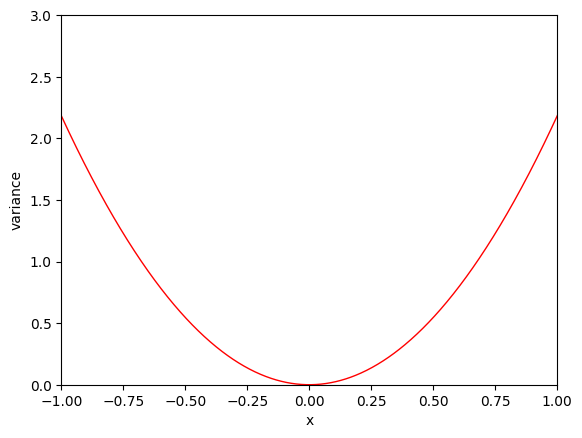

total = 1000
bias^2 = 0.20748274805457556
variance = 0.729325074015696


(0.20748274805457556, 0.729325074015696)

In [15]:
sine_wave_origin(2,1000,0)